In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
x = np.linspace(0,50,501)

In [46]:
y = np.sin(x)

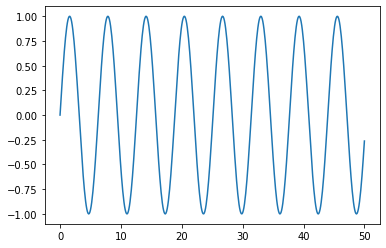

In [47]:
plt.plot(x,y)

In [5]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [6]:
len(df)

501

In [49]:
def train_test(df, test_size):
    test_size = x
    test_point = np.round(len(df)*test_size)
    test_ind = int(len(df)-test_point)
    train = df.iloc[:test_ind]
    test = df.iloc[test_ind:]
    return train , test

In [48]:
train,test = train_test(df,0.1)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [17]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
#help(TimeseriesGenerator)

In [30]:
length = 25
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length = length, batch_size=batch_size)

In [58]:
len(generator)

401

In [32]:
X,y = generator[0]

In [33]:
X, y

(array([[[0.49999912],
         [0.54991622],
         [0.59933458],
         [0.64776041],
         [0.69470985],
         [0.73971381],
         [0.78232262],
         [0.82211054],
         [0.85868004],
         [0.89166571],
         [0.92073798],
         [0.94560637],
         [0.9660224 ],
         [0.98178208],
         [0.99272794],
         [0.99875061],
         [0.99978993],
         [0.9958355 ],
         [0.98692684],
         [0.97315296],
         [0.95465148],
         [0.93160726],
         [0.90425056],
         [0.87285471],
         [0.83773342]]]), array([[0.79923759]]))

<Figure size 1440x720 with 0 Axes>

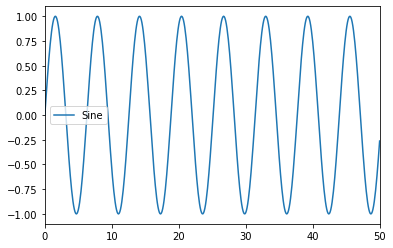

In [29]:
plt.figure(figsize=(20,10))
df.plot()

In [34]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length = length, batch_size=batch_size)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [36]:
n_features = 1

In [37]:
model = Sequential()
model.add(SimpleRNN(50, input_shape = (length,n_features)))

model.add(Dense(1))

model.compile(loss='mse', optimizer = 'adam')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit_generator(generator, epochs=5)

Epoch 1/5
401/401 [==============================] - 55s 138ms/step - loss: 0.0062
Epoch 2/5
401/401 [==============================] - 41s 102ms/step - loss: 1.4587e-04
Epoch 3/5
401/401 [==============================] - 39s 97ms/step - loss: 1.3235e-04
Epoch 4/5
401/401 [==============================] - 39s 98ms/step - loss: 7.4772e-04
Epoch 5/5
401/401 [==============================] - 52s 129ms/step - loss: 2.2766e-05


In [40]:
losses = pd.DataFrame(model.history.history)

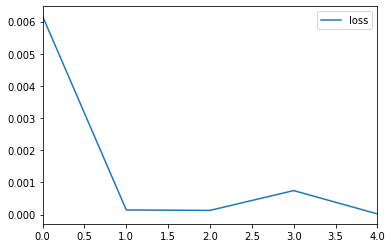

In [41]:
losses.plot()

In [60]:
first_eval_batch = scaled_train[-length:]
first_eval_batch = first_eval_batch.reshape((1,length,n_features))


In [67]:
model.predict(first_eval_batch)

array([[0.95045567]], dtype=float32)

In [64]:
scaled_test[0]

array([0.94955134])

In [65]:
current_batch.shape

(1, 50, 1)

In [72]:
test_predictions = []
first_eval_batch= scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)


In [73]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [74]:
predictions = scaler.inverse_transform(test_predictions)
predictions

array([[ 0.90090587],
       [ 0.93977351],
       [ 0.96916778],
       [ 0.98817352],
       [ 0.99697551],
       [ 0.99637422],
       [ 0.9850232 ],
       [ 0.96443068],
       [ 0.93441545],
       [ 0.89547176],
       [ 0.84841892],
       [ 0.79282146],
       [ 0.72991737],
       [ 0.65990834],
       [ 0.58355243],
       [ 0.50181056],
       [ 0.41504835],
       [ 0.32420218],
       [ 0.23021321],
       [ 0.13337241],
       [ 0.03509396],
       [-0.06418304],
       [-0.16337814],
       [-0.26110668],
       [-0.35693439],
       [-0.4489988 ],
       [-0.53692773],
       [-0.61938601],
       [-0.6951413 ],
       [-0.76386645],
       [-0.82437482],
       [-0.87630467],
       [-0.91935937],
       [-0.95249178],
       [-0.97620037],
       [-0.98967522],
       [-0.99297638],
       [-0.98670364],
       [-0.96993382],
       [-0.94399225],
       [-0.90851083],
       [-0.86410093],
       [-0.81209871],
       [-0.75191777],
       [-0.68541405],
       [-0

In [76]:
test['Predictions'] = predictions

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
def percentage_error(dataframe,pred, true_value):
    
    '''
    dataframe: Pass in pandas dataframe variable
    pred = dataframe['Predictions'] #model.predict(x_test).reshape()
    true_value = dataframe['True Values'] #y_test
    
    '''
    
    difference = true_value - pred
    
    dataframe['Error(%)']= np.absolute(difference/true_value*100)
    
    print('Average Percentage Error is: {}'.format(dataframe['Error(%)'].mean()))

In [80]:
percentage_error(test,test['Predictions'], test['Sine'])
test

Average Percentage Error is: 2.4270632455225414


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Sine,Predictions,Error(%)
45.1,0.899097,0.900906,0.201161
45.2,0.938307,0.939774,0.156242
45.3,0.968142,0.969168,0.105907
45.4,0.988304,0.988174,0.013209
45.5,0.998591,0.996976,0.161764
45.6,0.998900,0.996374,0.252865
45.7,0.989229,0.985023,0.425122
45.8,0.969673,0.964431,0.540640
45.9,0.940429,0.934415,0.639444
46.0,0.901788,0.895472,0.700452


In [81]:
test.describe()

,Sine,Predictions,Error(%)
count,50.000000,50.000000,50.000000
mean,-0.098988,-0.095407,2.427063
std,0.751484,0.747809,6.911201
min,-0.999986,-0.992976,0.013209
25%,-0.808806,-0.800041,0.427153
50%,-0.315008,-0.314395,0.700706
75%,0.715922,0.712415,1.247722
max,0.998900,0.996976,46.913295


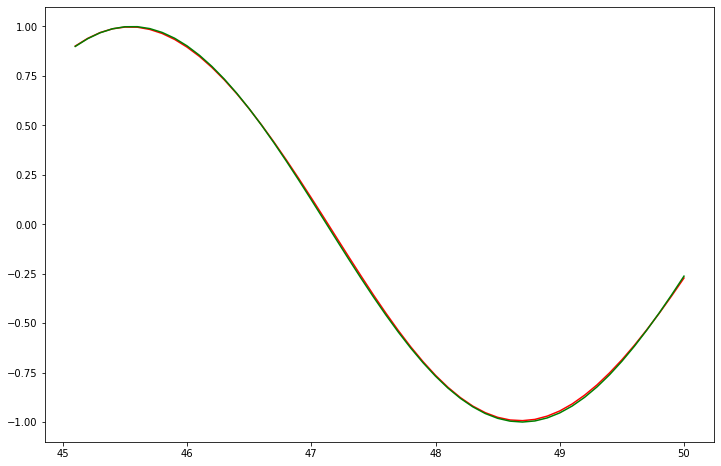

In [83]:
plt.figure(figsize=(12,8))
plt.plot(test['Predictions'], color='r')
plt.plot(test['Sine'], color='g')

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

In [85]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [86]:
length = 49

generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length, batch_size=1)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length, batch_size=1)

In [87]:
model = Sequential()
model.add(LSTM(50, input_shape = (length,n_features)))

model.add(Dense(1))

model.compile(loss='mse', optimizer = 'adam')

In [88]:
model.fit_generator(generator,epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
402/402 [==============================] - 101s 252ms/step - loss: 0.0154 - val_loss: 1.9180e-05
Epoch 2/20
402/402 [==============================] - 74s 183ms/step - loss: 1.4426e-04 - val_loss: 1.5825e-04
Epoch 3/20
402/402 [==============================] - 75s 185ms/step - loss: 2.2485e-04 - val_loss: 6.0920e-05


In [89]:
test_predictions = []
first_eval_batch= scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)


In [90]:
predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = predictions

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


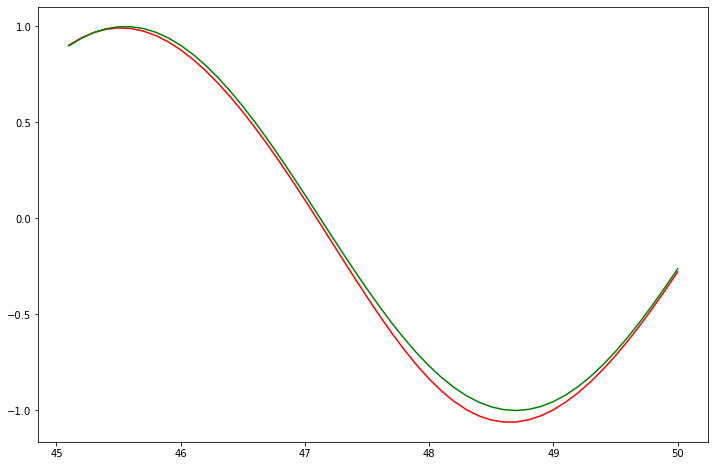

In [92]:
plt.figure(figsize=(12,8))
plt.plot(test['Predictions'], color='r')
plt.plot(test['Sine'], color='g')

In [93]:
percentage_error(test,test['Predictions'], test['Sine'])
test

Average Percentage Error is: 8.84395576302984


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Sine,Predictions,Error(%)
45.1,0.899097,0.902908,0.423840
45.2,0.938307,0.940621,0.246610
45.3,0.968142,0.968330,0.019408
45.4,0.988304,0.985714,0.262046
45.5,0.998591,0.992689,0.591031
45.6,0.998900,0.989325,0.958604
45.7,0.989229,0.975823,1.355142
45.8,0.969673,0.952501,1.770904
45.9,0.940429,0.919762,2.197610
46.0,0.901788,0.878080,2.629066


In [94]:
test.describe()

,Sine,Predictions,Error(%)
count,50.000000,50.000000,50.000000
mean,-0.098988,-0.132676,8.843956
std,0.751484,0.767062,17.296116
min,-0.999986,-1.060117,0.019408
25%,-0.808806,-0.846619,3.165458
50%,-0.315008,-0.341848,4.986040
75%,0.715922,0.686795,8.635157
max,0.998900,0.992689,119.644792
